<a href="https://colab.research.google.com/github/ucfilho/Disciplina_Metodos_Numericos_2020/blob/master/Mod_03_class_03_ode_metodos_out_05_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/ucfilho/Disciplina_Metodos_Numericos_2020 #clonar do Github
%cd Disciplina_Metodos_Numericos_2020

Cloning into 'Disciplina_Metodos_Numericos_2020'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 448 (delta 29), reused 0 (delta 0), pack-reused 385
Receiving objects: 100% (448/448), 657.87 KiB | 1.78 MiB/s, done.
Resolving deltas: 100% (253/253), done.
/content/Disciplina_Metodos_Numericos_2020


No handles with labels found to put in legend.


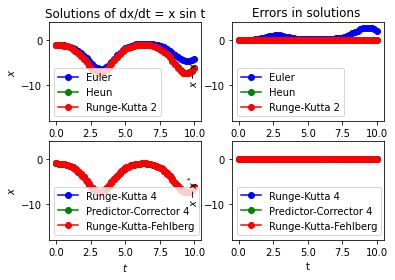

In [3]:
from edo_rotinas import euler, heun, rk2a,rk2b
from edo_rotinas import rk4, rk45, rkf, pc4

def f( x, t ):
  return x * np.sin( t )
      

a, b = ( 0.0, 10.0 )
x0 = -1.0

n = 51
t = np.linspace( a, b, n )
h = t[1] - t[0];
tol = 1e-6

# compute various numerical solutions
x_euler = euler( f, x0, t )
x_heun = heun( f, x0, t )
x_rk2 = rk2a( f, x0, t )
x_rk4 = rk4( f, x0, t )
x_pc4 = pc4( f, x0, t )
t_rkf, x_rkf = rkf( f, a, b, x0, tol, 1.0, 0.01 ) # unequally spaced t

# compute true solution values in equal spaced and unequally spaced cases
x = -np.exp( 1.0 - np.cos( t ) )
xrkf = -np.exp( 1.0 - np.cos( t_rkf ) )

plt.legend(fontsize=2) 
#   figure( 1 )
plt.subplot( 221 )
plt.plot( t, x_euler, 'b-o', t, x_heun, 'g-o', t, x_rk2, 'r-o' )
plt.ylim(-18,4)
plt.xlabel( 't' )
plt.ylabel( '$x$' )
plt.title( 'Solutions of dx/dt = x sin t')
plt.legend( ( 'Euler ', 'Heun ', 'Runge-Kutta 2' ),
            loc='lower left' )

#   figure( 2 )
plt.subplot( 222 )
plt.plot( t, x_euler - x, 'b-o', t, x_heun - x, 'g-o', t, x_rk2 - x, 'r-o' )
plt.ylim(-18,4)
plt.xlabel( 't' )
plt.ylabel( '$x - x^*$' )
plt.title( 'Errors in solutions ' )
plt.legend( ( 'Euler', 'Heun', 'Runge-Kutta 2' ),loc='lower left' )

#   figure( 3 )
plt.subplot( 223)
plt.plot( t, x_rk4, 'b-o', t, x_pc4, 'g-o', t_rkf, x_rkf, 'r-o' )
plt.ylim(-18,4)
plt.xlabel( '$t$' )
plt.ylabel( '$x$' )
#title( 'Solutions of dx/dt = x sin t' )
plt.legend( ( 'Runge-Kutta 4', 'Predictor-Corrector 4', \
              'Runge-Kutta-Fehlberg' ), loc='lower left' )

#   figure( 4 )
plt.subplot( 224 )
plt.plot( t, x_rk4 - x, 'b-o', t, x_pc4 - x, 'g-o', t_rkf, x_rkf - xrkf, 'r-o' )
plt.ylim(-18,4)
plt.xlabel( 't' )
plt.ylabel( '$x - x^*$' )
plt.legend( ( 'Runge-Kutta 4', 'Predictor-Corrector 4','Runge-Kutta-Fehlberg' ), loc='lower left' )

plt.show()